# UCI Wine Dataset: K-means vs Hierarchical
This notebook executes the full pipeline (Data Loading & Preprocessing → First EDA → PCA → Feature Engineering → Clustering & Validation → Second EDA & Inference → Presentation) and displays the key artifacts.

Deliverables produced by the pipeline:
- Scaled dataset CSV
- Figures (histograms, scree, indices vs k, dendrograms, PCA scatter, cluster profiles)
- PDF report
- Slides (PPTX)


In [17]:
import os, json
from IPython.display import Image, display
import pandas as pd

# Ensure we're in the project root
BASE_DIR = os.path.dirname(os.path.abspath('wine_clustering.ipynb'))
OUT_DIR = os.path.join(BASE_DIR, 'outputs')
FIG_DIR = os.path.join(OUT_DIR, 'figures')
HIST_DIR = os.path.join(FIG_DIR, 'histograms')

print('Base dir:', BASE_DIR)


Base dir: c:\Users\BMC\Desktop\Clustering


In [18]:
# Run the full pipeline
from wine_clustering import main
main()
print('Pipeline finished.')


First 10 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29      

## Part A: Data Loading & Preprocessing
Scaled dataset was saved to `outputs/scaled_wine.csv`.


In [19]:
scaled_df = pd.read_csv(os.path.join(OUT_DIR, 'scaled_wine.csv'))
scaled_df.head(10)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


## Part B: First EDA
Histograms and PCA scree plot:

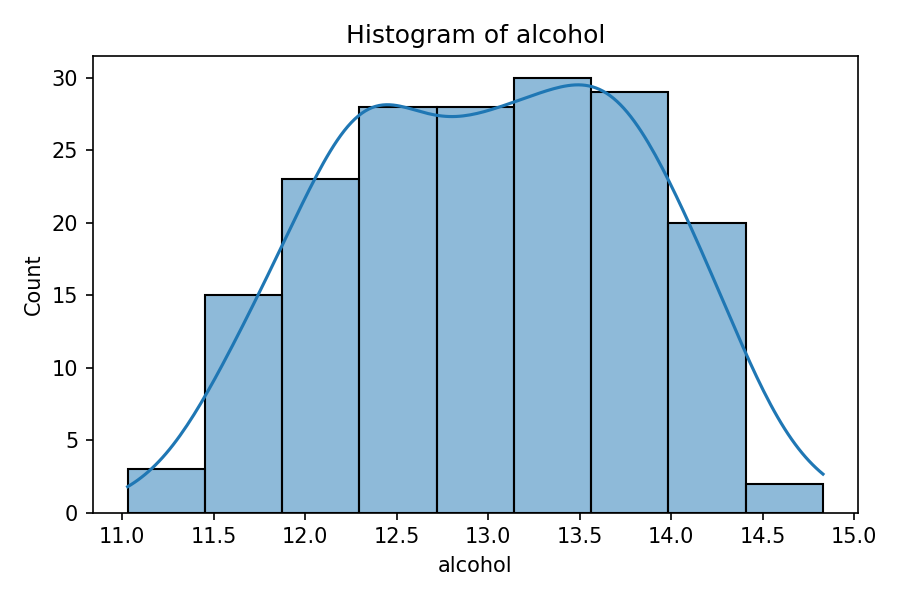

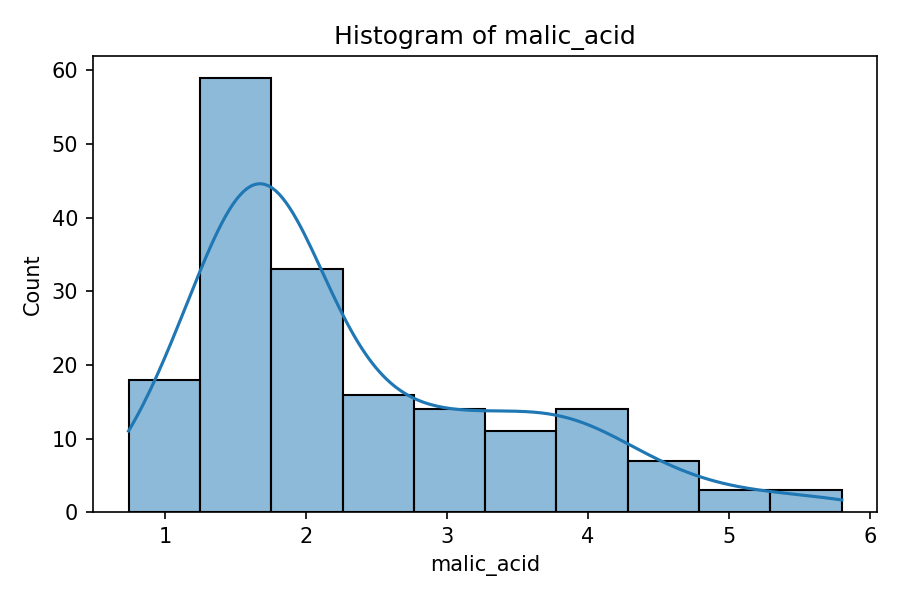

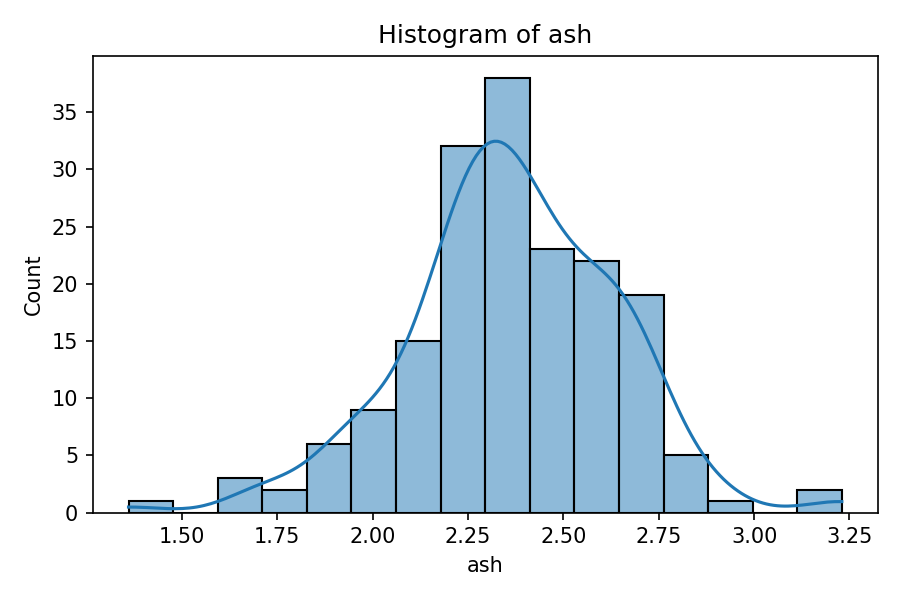

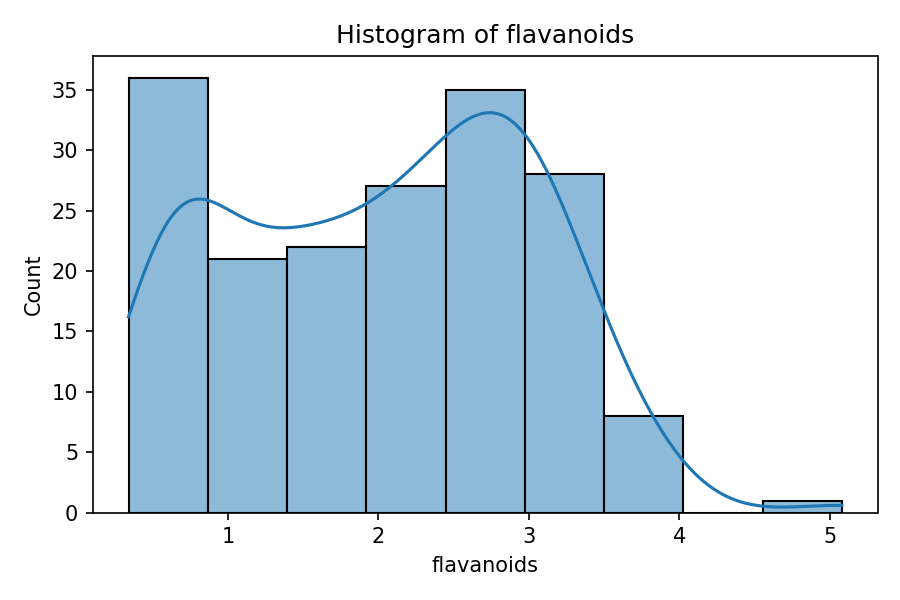

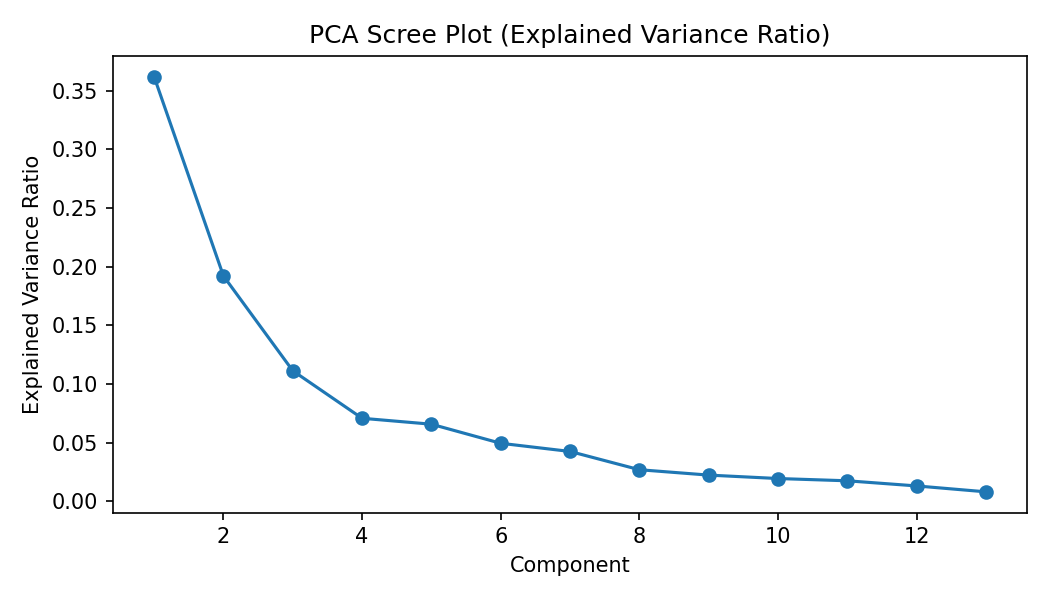

In [20]:
for img in ['alcohol_hist.png','malic_acid_hist.png','ash_hist.png','flavanoids_hist.png']:
    display(Image(filename=os.path.join(HIST_DIR, img)))
display(Image(filename=os.path.join(FIG_DIR, 'pca_scree.png')))


## Part C & D: Feature Engineering and Clustering
Indices vs k for different feature sets and chosen configuration:

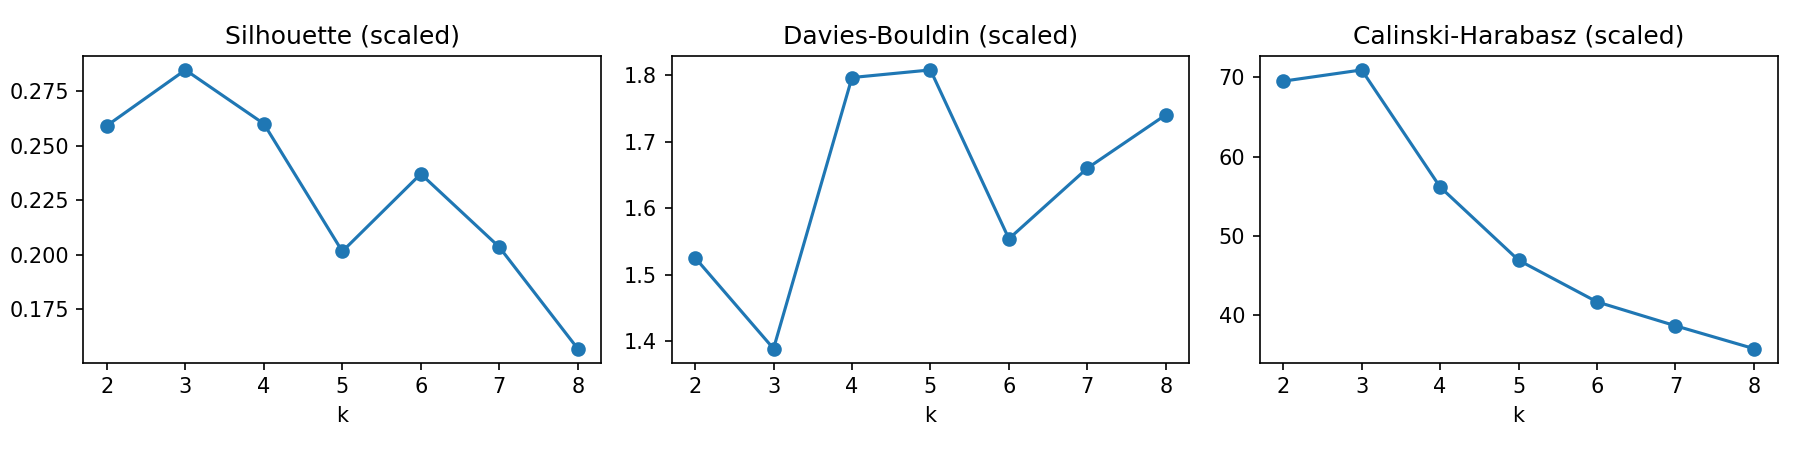

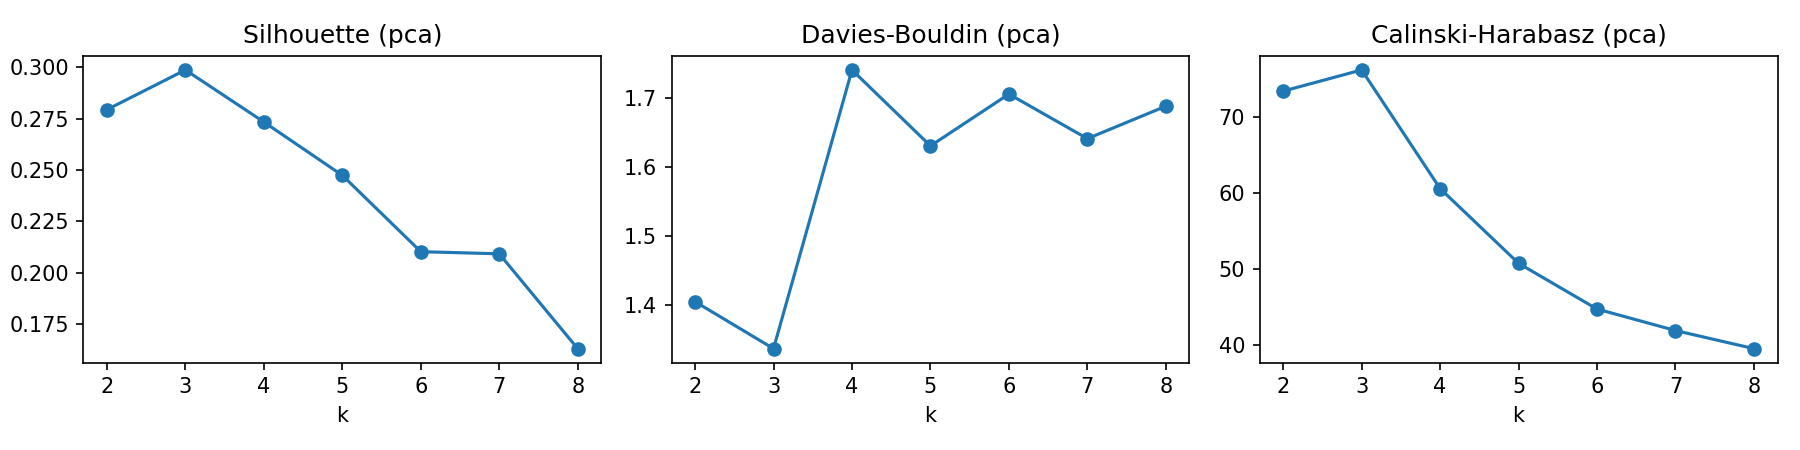

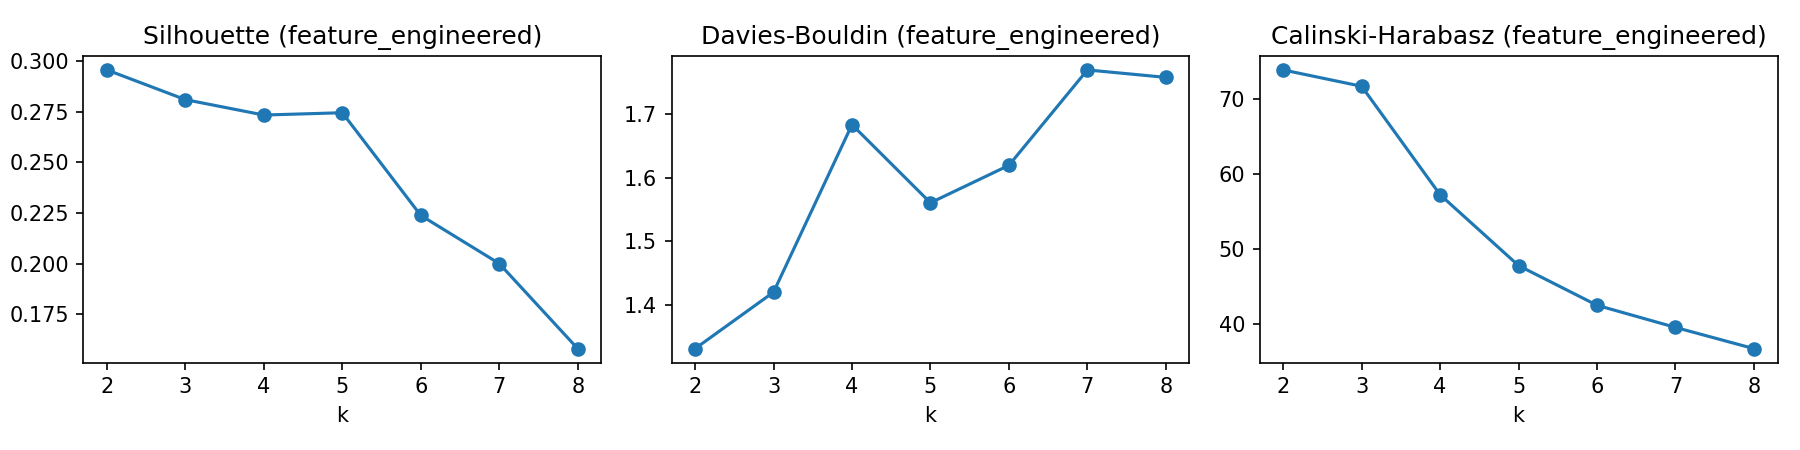

,feature_set,k,silhouette,davies_bouldin,calinski_harabasz
8,pca,3,0.298675,1.336326,76.179580
14,feature_engineered,2,0.295543,1.331428,73.944757
1,scaled,3,0.284859,1.389188,70.940008
15,feature_engineered,3,0.280891,1.420036,71.760113
7,pca,2,0.279332,1.404439,73.396663
17,feature_engineered,5,0.274435,1.560346,47.806856
9,pca,4,0.273319,1.740504,60.589227
16,feature_engineered,4,0.273300,1.682968,57.269866
2,scaled,4,0.260170,1.796892,56.181355
0,scaled,2,0.259317,1.525997,69.523332


In [21]:
display(Image(filename=os.path.join(FIG_DIR, 'indices_vs_k_scaled.png')))
display(Image(filename=os.path.join(FIG_DIR, 'indices_vs_k_pca.png')))
display(Image(filename=os.path.join(FIG_DIR, 'indices_vs_k_feature_engineered.png')))

km_metrics = pd.read_csv(os.path.join(OUT_DIR, 'kmeans_metrics.csv'))
km_metrics.sort_values(['silhouette','davies_bouldin','calinski_harabasz'], ascending=[False, True, False]).head(10)


## Hierarchical Clustering
Dendrograms and cophenetic correlations:

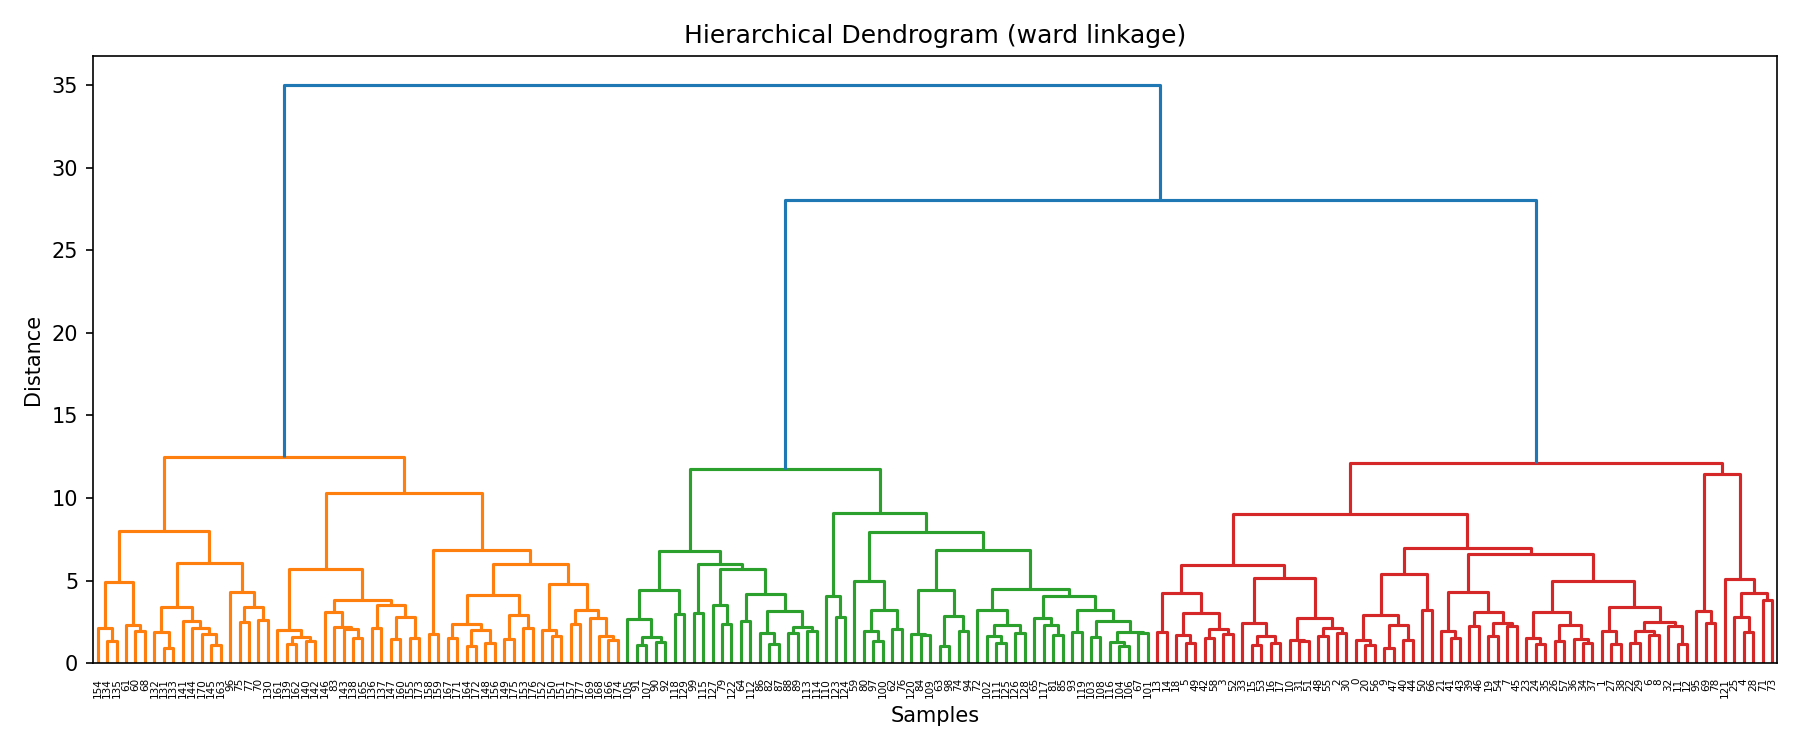

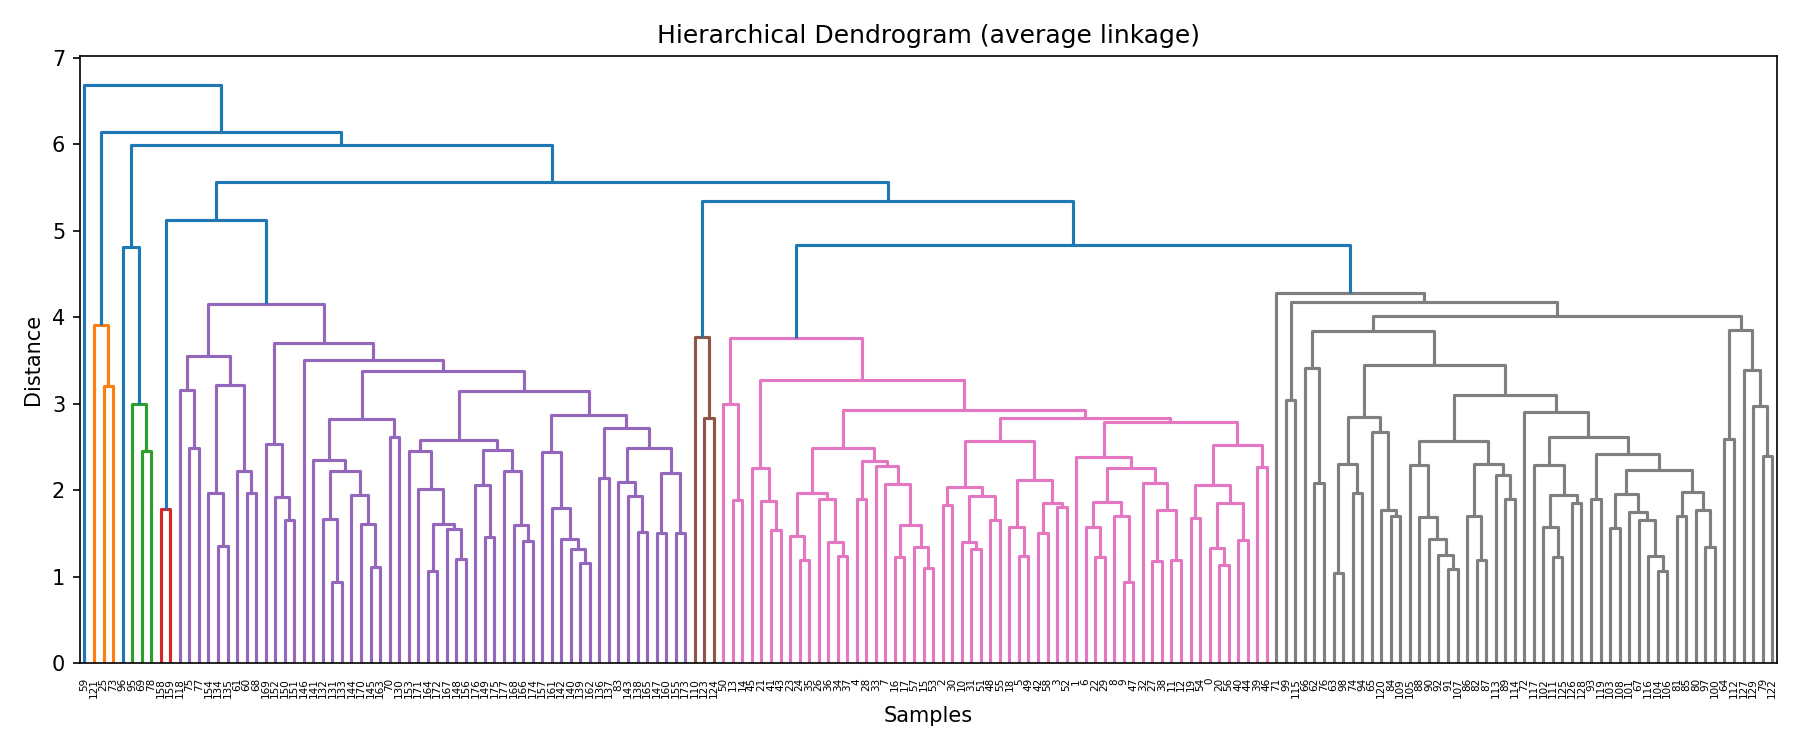

{'ward': 0.6636810915961221, 'average': 0.7614811925889803}

In [22]:
display(Image(filename=os.path.join(FIG_DIR, 'dendrogram_ward.png')))
display(Image(filename=os.path.join(FIG_DIR, 'dendrogram_average.png')))
with open(os.path.join(OUT_DIR, 'cophenetic.json')) as f:
    cophen = json.load(f)
cophen


## External Validation (Optional)
Adjusted Rand Index (ARI) and Normalized Mutual Info (NMI):

In [23]:
with open(os.path.join(OUT_DIR, 'external_validation.json')) as f:
    ext = json.load(f)
ext


{'ARI': 0.8974949815093207, 'NMI': 0.8758935341223069}

## Part E: Second EDA & Statistical Inference
Cluster centroids (original units), PCA scatter by cluster, and statistical tests:

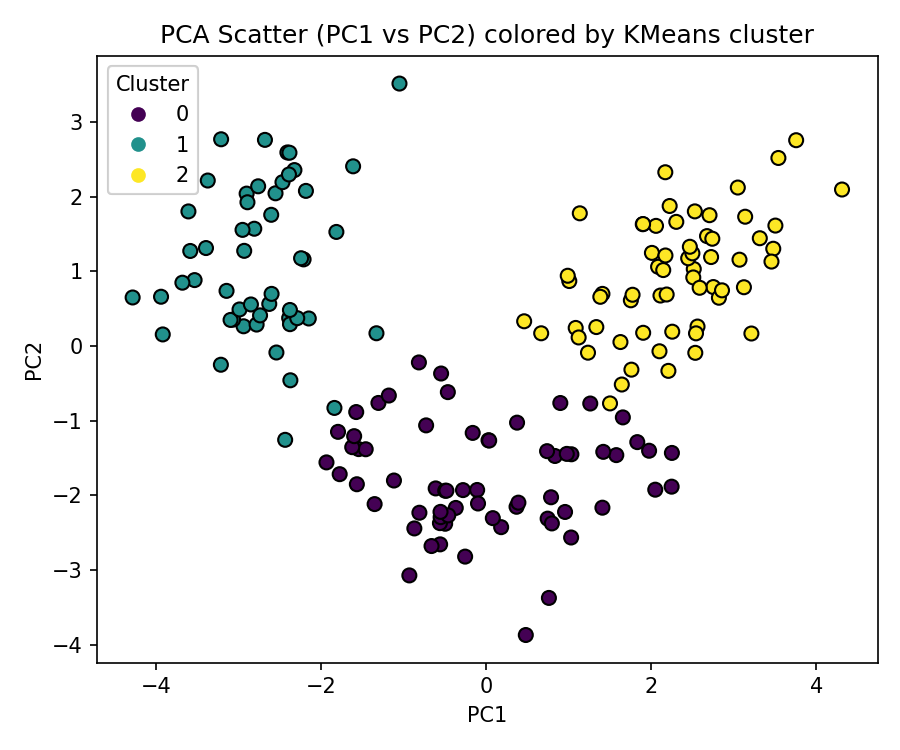

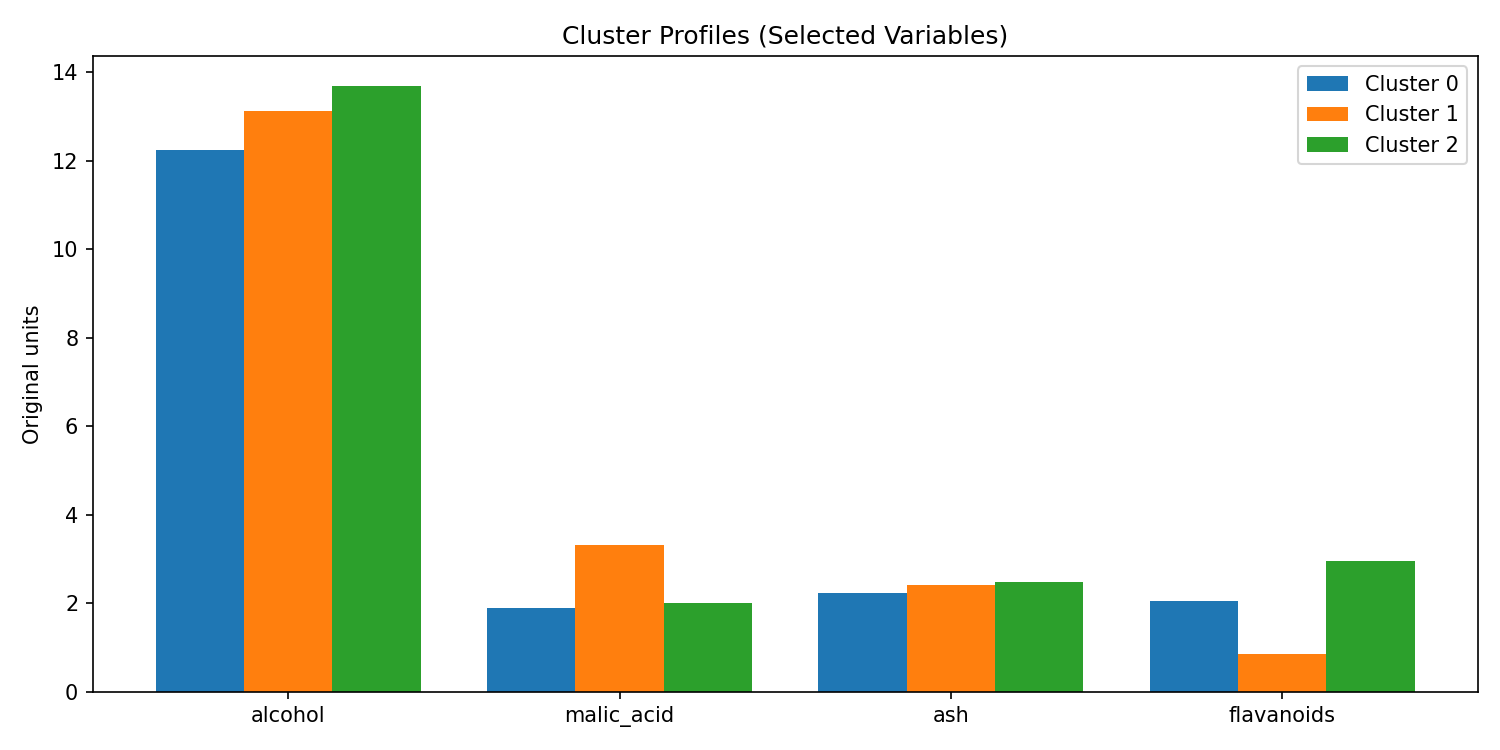

{'alcohol': {'ANOVA_F': 113.16607091042144,
  'ANOVA_p': 2.8789509285759764e-32,
  'eta_squared': 0.5639521937963277,
  'Kruskal_H': 101.94690118914917,
  'Kruskal_p': 7.286377757577904e-23,
  'epsilon_squared': 0.571125149652281},
 'flavanoids': {'ANOVA_F': 271.5898201993902,
  'ANOVA_p': 2.2153071821871036e-54,
  'eta_squared': 0.7563283750249049,
  'Kruskal_H': 133.2849926105377,
  'Kruskal_p': 1.1416463548990091e-29,
  'epsilon_squared': 0.7501999577745011}}

In [25]:
centroids = pd.read_csv(os.path.join(OUT_DIR, 'cluster_centroids_original_units.csv'))
centroids

display(Image(filename=os.path.join(FIG_DIR, 'pca_scatter_kmeans.png')))
display(Image(filename=os.path.join(FIG_DIR, 'cluster_profiles_bar.png')))

with open(os.path.join(OUT_DIR, 'stat_tests.json')) as f:
    stats_res = json.load(f)
stats_res


## Part F: Presentation & Reflection
- Report PDF saved to `outputs/wine_clustering_report.pdf`.
- Slides saved to `outputs/wine_clustering_slides.pptx`.

PCA reduced dimensionality and mitigated redundancy, improving cluster separation (when selected by metrics). K-means offers efficient partitioning with interpretable centroids, while hierarchical gives dendrogram insights and cophenetic correlation for structure fidelity. Trade-offs include K-means sensitivity to scale and centroid assumptions vs. hierarchical computational cost and linkage choice effects.